# Example notebook rbatools

Here we exemplify rbatools with the existing RBA-model of Bacillus subtilis (https://pubmed.ncbi.nlm.nih.gov/26498510/).

For further information on rba, please consider our website: https://rba.inrae.fr 

In [1]:
# doing necessary imports:

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn
import pandas
import numpy
import rba

from ipywidgets import IntProgress
from IPython.display import display

from rbatools.rba_session import SessionRBA
from sample_models import sample_model_loader

# 1. Initiating modelling session and results handeling

## Starting of session
Here we initiate an rbatools.rba_session.SessionRBA with a model of B.subtilis. Variable 'model_filename' specifies where the RBA model is located and should be changed by the user. 

Upon initiation of session explicit exchange reactions for external metabolites are added, to facilitate conveinient acces to metabolite exchange rates.

#### 'Bacterial-RBA-models' directory with different bacterial RBA models can be obtained from: https://github.com/SysBioInra/Bacterial-RBA-models

#### --> Relevant rbatools.rba_ression.SessionRBA methods on used here, are '__init__' and 'add_exchange_reactions'.

In [2]:
print(SessionRBA.__doc__)


    User interface with high level functions to import model, change model,
    different solving methods and results export.

    Attributes
    ----------
    xml_dir : str
        Directory of imported xml model files
    model : rba.RbaModel
        RBA model (parsed from xml files), from which matrices are built
    Problem : rbatools.rba_problem.ProblemRBA
        RBA Problem
    Medium : dict
        Dictionary with external metabolites and corresponding concentrations
    ModelStructure : rbatools.rba_model_structure.ModelStructureRBA
        Model structure representation
    Results : dict
        Simulation results, added if record_results method has been called
    Parameters : dict
        Simulation parameters, added if record_parameters method has been called
    SimulationData : rbatools.rba_simulation_data.SimulationDataRBA
        SimulationData object, added if write_results method has been called
    SimulationParameters : rbatools.rba_simulation_parameters.Simulat

In [3]:
print(SessionRBA.__init__.__doc__)


        Creates SessionRBA object from files

        Parameters
        ----------
        xml_dir : str
            Path to the directory where rba-model files are located.
        lp_solver : str
            Specifies which LP-solver should be used ('cplex' or 'swiglpk')
            Default: 'cplex'
        


In [4]:
print(SessionRBA.add_exchange_reactions.__doc__)


        Adds explicit exchange-reactions of boundary-metabolites to RBA-problem,
        named R_EX_ followed by metabolite name (without M_ prefix).
        


In [5]:
print(sample_model_loader.list_sample_models.__doc__)


    Returns all included sample models
    


In [6]:
print(sample_model_loader.get_sample_model.__doc__)


        Returns path to sample model

        Parameters
        ----------
        model: Name of model (folder with RBA-xml files in sample_models directory)
        
        Returns
        -------
        path to sample model (relative to jupyter notebook directory).
    


In [2]:
sample_model_loader.list_sample_models()

['Bacillus-subtilis-168-WT']

In [3]:
#model_filename = '../../../Bacterial-RBA-models/Bacillus-subtilis-168-WT' #if you have cloned the Bacterial-RBA-models repo
model_filename = sample_model_loader.get_sample_model(model='Bacillus-subtilis-168-WT') #use included sample model

# initiate RBA-session with cplex as lp solver. 
#If cplex is not available glpk can be used as lp solver.
#However swiglpk is significantly slower
Simulation = SessionRBA(xml_dir=model_filename, lp_solver="cplex")
#Simulation = SessionRBA(xml_dir=model_filename, lp_solver="swiglpk")
Simulation.add_exchange_reactions()


## Simulation-results handling
Here we perform simple simulation runs and record the corresponding set of parameters and results.
After we have performed all desired simulations (and did the corresponding recordings) we write them to Simulation results object. From those objects the results and parameters can be exported into various formats.
#### --> Relevant rbatools.rba_session.SessionRBA methods used here, are 'find_max_growth_rate', 'record_results', 'record_parameters' and 'write_results'.

In [9]:
print(Simulation.find_max_growth_rate.__doc__)


        Applies dichotomy-search to find the maximal feasible growth-rate.

        Parameters
        ----------
        precision : float
            Numberic precision with which maximum is approximated.
            Default: 0.00001
        max : float
            Defines the highest growth rate to be screened for.
            Default: 4.0
        start_value : float
            Defines the first growth-rate to test during the dichotomy search.
            Default: numpy.nan --> then the middle between 0 and max is used.
        recording : bool
            Records intermediate feasible solutions
            while approaching the maximum growth-rate.
            Default: False
        feasible_stati : list of str
            List with acceptable solution statuses.
            Default: ["optimal","feasible"]
        try_unscaling_if_sol_status_is_feasible_only_before_unscaling : bool
            If true; the problem will be attempted to be solved without scaling,
            if the 

In [10]:
print(Simulation.record_results.__doc__)


        Records Simulation output for further use.
        and stores them in own 'Results'-attribute as pandas.DataFrames in a dictionary
        with the respective run-name being a column in all DataFrames.

        Parameters
        ----------
        run_name : str
            Name of observation.
            Serves as ID for all Data, originating from these.
        


In [11]:
print(Simulation.record_parameters.__doc__)


        Records Simulation parameters (LP-coefficients etc.) for further use.
        and stores them in own 'Parameters'-attribute as pandas.DataFrames in a dictionary
        with the respective run-name being a column in all DataFrames.

        Parameters
        ----------
        run_name : str
            Name of observation.
            Serves as ID for all Data, originating from these.
        


In [ ]:
print(Simulation.write_results.__doc__)

#### Here we exemplify storing simulation data, by obtaining two growth-optimal cellular states and recording them as "TestRun_1" and "TestRun_2":

In [ ]:
Simulation.find_max_growth_rate() #determine growth-optimal state
Simulation.record_results(run_name="TestRun_1") #record corresponding state variables
Simulation.record_parameters(run_name="TestRun_1") #record corresponding problem coefficients

Simulation.find_max_growth_rate()
Simulation.record_results(run_name="TestRun_2")
Simulation.record_parameters(run_name="TestRun_2")


#### Here we write the recorded results to a results object:

In [ ]:
Simulation.write_results(session_name="TestSession") 


## Simulation-results export
Here we export results and parameters into various formats, from the previously written data. The files are stored in the directory "tutorials/test_outputs" of the rbatools repository.
#### --> Relevant rbatools.rba_SimulationData.RBA_SimulationData methods used here, are 'export_sbtab', 'export_csv', 'export_escher_map' and 'export_proteo_map'.

In [ ]:
print(Simulation.SimulationData.export_sbtab.__doc__)

In [ ]:
print(Simulation.SimulationData.export_csv.__doc__)

In [ ]:
print(Simulation.SimulationData.export_escher_map.__doc__)

In [ ]:
print(Simulation.SimulationData.export_proteo_map.__doc__)

#### Here we export the written results into the format sbtab, escher map input-data for fluxes and protein-investment for different model-reactions and finally input for visualisation with proteo-maps for individual genes and all protein-isoforms (w.r.t cellular localisation):

In [ ]:
Simulation.SimulationData.export_sbtab(filename="../test_outputs/Test_SimulationResults_SBtab_Bsubtilis", 
                                       add_links=True)
Simulation.SimulationData.export_csv(output_directory="../test_outputs/")


#### Store json files, with the right input format to the escher-map visualization to current working directory:

In [ ]:
# escher map with flux values of metabolic reactions (mmol/(h*g_DW)):
Simulation.SimulationData.export_escher_map(type="fluxes", 
                                            output_directory="../test_outputs/") 
# escher map with protein investment into metabolic reactions (mmol Amino acid residues/g_DW):
Simulation.SimulationData.export_escher_map(type="investment", 
                                            output_directory="../test_outputs/")


#### Store tsv files, with the right input format to the proteo-map visualization:

In [ ]:
# proteo map with genes (all protein-isoforms considered together):
Simulation.SimulationData.export_proteo_map(type='genes', 
                                            output_directory="../test_outputs/")
# proteo map with protein-isoforms (proteins originating from same gene, 
#but located in different cellular compartments are considered individually):
Simulation.SimulationData.export_proteo_map(type='isoforms', 
                                            output_directory="../test_outputs/")

In [ ]:

df1 = Simulation.SimulationData.ReactionData.to_data_frame()
print(df1)
sbt = Simulation.SimulationData.ReactionData.to_sbtab(table_id='reaction_flux', 
                                                      table_type='QuantityMatrix', 
                                                      table_name='Reaction fluxes')
sbt.filename = 'ReactionData.tsv'
sbt.change_attribute('Unit', 'mmol/(h*gDW)')
sbt.change_attribute('QuantityType', 'reaction_flux')
sbt.change_attribute('Text', 'Reaction fluxes obtained in the simulation runs (table columns).')
sbt.unset_attribute('SBtabVersion')
print(sbt.columns)
df_sbtab = sbt.to_data_frame()
print(df_sbtab)


In [ ]:
print(Simulation.SimulationParameters.export_sbtab.__doc__)

In [ ]:
Simulation.SimulationParameters.export_sbtab(filename="../test_outputs/Test_SimulationParameters_SBtab_Bsubtilis")


# 2. Investigating (growth-optimal) cellular states

## Glucose screen
Here we iterate through a predefined list of glucose concentrations (glcs) and determine the corresponding maximum growth-rates and optimal configuration of exchange fluxes. Maximum growth-rate vs. glucose results in  a Monod curve
#### --> Relevant rbatools.rba_session.SessionRBA methods used here, are 'get_medium', 'set_medium', 'find_max_growth_rate' and 'return_exchange_fluxes'.

In [ ]:
print(Simulation.reload_model.__doc__)

In [ ]:
print(Simulation.get_medium.__doc__)

In [ ]:
print(Simulation.set_medium.__doc__)

In [ ]:
print(Simulation.find_max_growth_rate.__doc__)

In [ ]:
print(Simulation.return_exchange_fluxes.__doc__)

#### Lets first look at the current Medium:

In [ ]:
print(Simulation.get_medium())

#### Here we firstly generate a list of several glucose-concentrations in the medium to screen. Then we iterate over all of them and determine the respective growth-optimal states and store relevant information for visualisation (maximum growth-rates and exchange-fluxes with the medium):

In [40]:
Simulation.reload_model()

glcs = [0.005+(i*0.0025) for i in range(27)] # generate glucose concentration intervals
Results_glc_screen = {"Mu":[],"M_glc":[],"M_o2":[],"M_ac":[]} # generate empty structure to store results of interest
f = IntProgress(min=0, max=len(glcs)) # initiate progress bar
display(f) # show progress bar
for glc_conc in glcs: # iterate through all generated glucose concentrations
    f.value += 1 # increment progress bar
    Simulation.set_medium({'M_glc':glc_conc}) #set glucose concnetration to respective value
    #determine growth-optimal state and maximum growth-rate:
    mumax = Simulation.find_max_growth_rate()
    J_ex = Simulation.return_exchange_fluxes() # obtain corresponding exchange-fluxes
    # write growth-rate and exchanges for glucose, oxygen and acetate to storing structure:
    for i in Results_glc_screen.keys():
        if i == "Mu":
            Results_glc_screen["Mu"].append(mumax)
        else:
            if i in J_ex.keys():
                Results_glc_screen[i].append(J_ex[i])
            else:
                Results_glc_screen[i].append(0)
                

IntProgress(value=0, max=27)

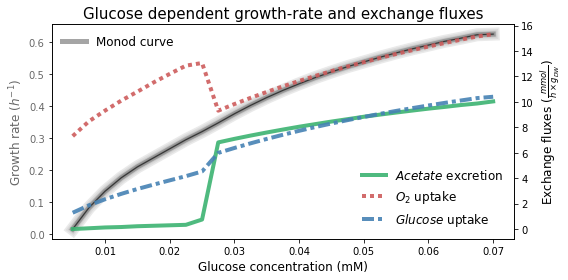

In [41]:
# plot results of glucose screen
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.plot(glcs, Results_glc_screen["Mu"], linewidth=5, alpha=0.6, color="dimgray")
ax.legend(["Monod curve"], loc="upper left", fontsize=12, frameon=False)
ax.plot(glcs, Results_glc_screen["Mu"], linewidth=13, alpha=0.6, color="gainsboro")
ax.plot(glcs, Results_glc_screen["Mu"], linewidth=10, alpha=0.6, color="lightgray")
ax.plot(glcs, Results_glc_screen["Mu"], linewidth=7, alpha=0.6, color="silver")
ax.plot(glcs, Results_glc_screen["Mu"], linewidth=5, alpha=0.6, color="gray")
ax.plot(glcs, Results_glc_screen["Mu"], linewidth=2, alpha=0.6, color="dimgray")
ax.plot(glcs, Results_glc_screen["Mu"], linewidth=1, alpha=0.6, color="black")
ax2=ax.twinx()
ax2.plot(glcs, [i for i in Results_glc_screen["M_ac"]], linewidth=4,
         color="mediumseagreen", alpha=0.9)
ax2.plot(glcs, [-i for i in Results_glc_screen["M_o2"]], linewidth=4, 
         color="indianred", alpha=0.9, linestyle=(0, (1, 1)))
ax2.plot(glcs, [-i for i in Results_glc_screen["M_glc"]], linewidth=4, 
         color="steelblue", alpha=0.9, linestyle=(0, (3, 1, 1, 1)))
ax2.legend(["$Acetate$ excretion","$O_2$ uptake","$Glucose$ uptake"], 
           loc="lower right", fontsize=12, frameon=False)

ax.set_title("Glucose dependent growth-rate and exchange fluxes", fontsize=15)
ax.set_xlabel("Glucose concentration (mM)", fontsize=12)
#ax.set_ylim(-0.01,0.69)
#ax.set_xlim(0.004,0.075)
ax.tick_params(axis='y', labelcolor="dimgrey")
ax2.tick_params(axis='y', labelcolor="black")
ax.set_ylabel("Growth rate ($h^{-1}$)", color="dimgrey", fontsize=12)
ax2.set_ylabel('Exchange fluxes ($\\frac{mmol}{h \\times g_{DW}}$)', 
               color="black", fontsize=12)
#ax2.set_ylim(-0.2,15.6)
plt.tight_layout()
plt.show()


## Search for minimal required glucose concentration at different growth rates
Here we iterate through a predefined list of growth rates and determine the corresponding required concentration of glucose. Results in a Monod curve with switched axes.
#### --> Relevant rbatools.rba_session.SessionRBA methods used here, are 'set_growth_rate' and 'find_min_substrate_concentration'.

In [ ]:
print(Simulation.set_growth_rate.__doc__)

In [ ]:
print(Simulation.find_min_substrate_concentration.__doc__)

In [ ]:
#determine maximum growth-rate among all growth-rates from previous analysis:
max_mu_glc_screen = max(list(Results_glc_screen["Mu"])) 

Simulation.reload_model()

n_intervals = 20 # specify number of intervals to screen
# generate specified number of intervals between 0 and maximum growth-rate:
mus=[max_mu_glc_screen*(i+1)/n_intervals for i in range(n_intervals)] 
glcs=[] # initiate empty list of glucose concentrations
f = IntProgress(min = 0, max = len(mus)) # initiate progress bar
display(f) #show progress bar
for mu in mus: #iterate through all specified growth rates
    f.value += 1 #increment progress bar
    Simulation.set_growth_rate(Mu=mu) #set growth-rate to specified value
    #determine minimum feasible glucose-concentration, still allowing specified growth-rate:
    min_glc = Simulation.find_min_substrate_concentration(metabolite="M_glc", 
                                                        precision=0.001, max=1.0)
    glcs.append(min_glc)#store determined minimum feasible growth rate
    

In [ ]:
#plot results
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)

ax.scatter(mus, glcs, s=10)
ax.set_title("Minimal required glucose concentration vs growth rate")
ax.set_ylabel("Glucose concentration ($mM$)", fontsize=8, labelpad=0.1)
ax.set_xlabel("Growth rate ($h^{-1}$)", fontsize=8, labelpad=1.5)
ax.set_ylim(0, 0.1)
plt.show()


## Derive Biomass functions
Here we derive biomass-functions for different growth-rates, as used as objectives in FBA-modelling, from the RBA-model. Since RBA, unlike FBA, allows a varying biomass-compostion with growth rate; we would like to provide the user with a method to also impose growth-rate specific objectives for FBA. 

(The derived biomass function is specified by a linear combination of metabolic-precursor fluxes, represented by biomass function coefficients (with unit mmol/(h*g_DW)).)
(Please note that only non-zero coefficients are returned.)

#### --> Relevant rbatools.rba_session.SessionRBA methods used here, is 'derive_current_biomass_function'

In [ ]:
print(Simulation.derive_current_biomass_function.__doc__)

#### Here we screen a range of growth rates, between zero and a maximum; to determine the corresponding biomass functions and write all of them into a data frame

In [ ]:
Simulation.reload_model()
glcs=[0.005+(i*0.005) for i in range(13)] #generate glucose concnetration intervals
f = IntProgress(min=0, max=len(glcs)) #initiate progress bar
display(f) #show progress-bar
biomass_functions=pandas.DataFrame() #initiate data-frame to store results
for glc_conc in glcs: # iterate through all generated glucose concentrations
    f.value += 1 #increment progress bar
    Simulation.reload_model()
    Simulation.set_medium({'M_glc':glc_conc}) #set glucose concnetration to respective value
    #determine growth-optimal state and maximum growth-rate:
    mumax = Simulation.find_max_growth_rate()
    #determine biomass function, specific to current state:
    current_bm_function = Simulation.derive_current_biomass_function(from_rba_solution=True)
    for metabolite in current_bm_function.index: #iterate through all non-zero biomass-components
        #check whether coefficient is above numerical-noise threchold:
        if abs(current_bm_function.loc[metabolite,"Coefficient"])>=10**-10:
            #write coefficient to results data-frame:
            biomass_functions.loc[metabolite,"Mu = {}".format(mumax)] = current_bm_function.loc[metabolite,"Coefficient"]


In [ ]:
#display results
biomass_functions

# 3. Investigating the feasible space and trade-offs of cellular variables 

## Variability Analysis on substrate exchange fluxes
Here we iterate through a predefined list of growth rates (between 0 and the maximum wild-type growth rate) and determine the corresponding feasible ranges of glucose- and oxygen uptake. 
#### --> Relevant rbatools.rba_session.SessionRBA methods used here, are 'set_medium', 'set_growth_rate' and 'get_feasible_range'.

In [ ]:
print(Simulation.get_feasible_range.__doc__)

In [ ]:
Simulation.reload_model()

Simulation.set_medium({'M_glc':0.025}) #set glucose concentration
mumax = Simulation.find_max_growth_rate() #determine maximum growth-rate
# generate growth-rates between 0 and maximum growth-rate:
Mus = [mumax*i for i in [0.01,0.025,0.05,0.075,0.1,0.125,0.15,0.175,0.2,0.225,0.25,0.275,0.3,0.325,0.35,0.375,0.4,0.425,0.45,0.475,0.5,0.525,0.55,0.575,0.6,0.625,0.65,0.675,0.7,0.725,0.75,0.775,0.8,0.825,0.85,0.875,0.9,0.925,0.95,0.975,0.9825,0.99,0.9925,0.995,0.9975,1]]
Reactions_to_check = ["R_EX_glc_e","R_EX_o2_e"] #specify reactions to determine feasible range for
#create empty data-structure for results:
Feasible_Ranges = dict(zip(Reactions_to_check,[{"Minima":[],"Maxima":[]},{"Minima":[],"Maxima":[]},{"Minima":[],"Maxima":[]}]))

f = IntProgress(min=0, max=len(Mus)) #initiate progress bar
display(f) #show progress bar
for mu in Mus: #iterate over all specified growth-rates
    f.value += 1 #increment progress bar 
    Simulation.set_growth_rate(Mu=mu) #set growth-rate to specified value
    # determine feasible ranges of variables in question:
    Feasible_range = Simulation.get_feasible_range(variables=Reactions_to_check)
    # write obtained extrema of feasible ranges to data structure:
    for rxn in Reactions_to_check:
        Feasible_Ranges[rxn]["Minima"].append(Feasible_range[rxn]['Min'])
        Feasible_Ranges[rxn]["Maxima"].append(Feasible_range[rxn]['Max'])
        

In [ ]:
# plot results
fig=plt.figure(figsize=(8,4))

ax = fig.add_subplot(111)

ax.fill_between(x=Mus, 
                y1=Feasible_Ranges["R_EX_glc_e"]["Minima"],
                y2=Feasible_Ranges["R_EX_glc_e"]["Maxima"], 
                interpolate=True, color='steelblue', alpha=0.25)
ax.plot(Mus, Feasible_Ranges["R_EX_glc_e"]["Minima"], 
        color='steelblue', alpha=0.9, linewidth=2, linestyle=(0, (3, 1, 1, 1)))
ax.plot(Mus, Feasible_Ranges["R_EX_glc_e"]["Maxima"], 
        color='steelblue', alpha=0.9, linewidth=2, linestyle=(0, (3, 1, 1, 1)))
ax2=ax.twinx()
ax2.fill_between(x=Mus, 
                 y1=Feasible_Ranges["R_EX_o2_e"]["Minima"], 
                 y2=Feasible_Ranges["R_EX_o2_e"]["Maxima"], 
                 interpolate=True, color='indianred', alpha=0.25)
ax2.plot(Mus, Feasible_Ranges["R_EX_o2_e"]["Minima"], 
         color='indianred', alpha=0.9, linewidth=2, linestyle=(0, (1, 1)))
ax2.plot(Mus, Feasible_Ranges["R_EX_o2_e"]["Maxima"], 
         color='indianred', alpha=0.9, linewidth=2, linestyle=(0, (1, 1)))

ax.tick_params(axis='y', labelcolor="royalblue")
ax2.tick_params(axis='y', labelcolor="indianred")
ax.set_ylim(0.5, 7.25)
ax.set_yticks([1,2,3,4,5,6,7])
#ax.set_xlim(0,0.335)
ax2.set_ylim(1, 24)
ax2.set_yticks([5,10,15,20])
#ax2.set_xlim(0,0.335)
ax.set_xticks([0.05,0.1,0.15,0.2,0.25,0.3])
ax2.set_xticks([0.05,0.1,0.15,0.2,0.25,0.3])
ax.set_xticklabels([0.05,0.1,0.15,0.2,0.25,0.3])
ax2.set_xticklabels([0.05,0.1,0.15,0.2,0.25,0.3])

ax.set_ylabel('$Glucose$ $\\frac{mmol}{h \\times g_{DW}}$)', 
              fontsize=12, color="steelblue")
ax2.set_ylabel('$O_2$ $\\frac{mmol}{h \\times g_{DW}}$)', 
               fontsize=12, color="indianred")

plt.title('Feasible uptake fluxes, over (sub-optimal) growth-rates', fontsize=15)
ax.set_xlabel('Growth-rate ($h^{-1}$)', fontsize=12)

plt.tight_layout()
plt.show()


## Metabolic engineering
Here we investigate the trade-off, between cellular fitness (maximum growth-rate) and production of a metabolic compound of interest. 
We firstly add a test-reaction, which only consumes thiamine-diphosphate (vitamin B1). Then we determine the maximum flux through this reaction at different growth-rates for different substrate concentrations.

Please note thate the resulting curve, corresponds directly to the upper boundary of the feasible range, obtained with the get_feasible_range method and could thus also be obtained this way.

#### --> Relevant rbatools.rba_session.SessionRBA methods used here, are 'add_reaction', 'set_medium' and 'find_max_growth_rate', 'set_growth_rate'.

#### --> Relevant rbatools.rba_problem.ProblemRBA methods used here, are 'clear_objective', 'set_objective' and 'solve_lp'



In [ ]:
print(Simulation.add_reaction.__doc__)

In [ ]:
print(Simulation.Problem.clear_objective.__doc__)

In [ ]:
print(Simulation.Problem.set_objective.__doc__)

In [ ]:
print(Simulation.Problem.solve_lp.__doc__)

#### Since there is no exchange reaction for the metabolite of interest (M_tpp) into a sink, we have to add such a reaction "making M_tpp_c disappear":

In [50]:
Simulation.reload_model()
Simulation.add_reaction(reaction_id="R_rxnTest", 
                        reactants={"M_tpp_c":1}, reversible=False)


In [51]:
Glucose_concentrations = [0.0125,0.025,0.0375,0.05,0.0625,0.075,0.0875,0.1,0.25,0.5,0.75,1] # generate list of glucose concentrations to test
Growth_rates = {} #create empty data structure for obtained growth rates
excretion_fluxes = {} #create empty data structure for metabolite excretion
f = IntProgress(min=0, max=len(Glucose_concentrations)) # initiate progress bar
display(f) #show progress bar 
for glc_conc in Glucose_concentrations: # iterate over glucose concentration
    f.value += 1 #increment progress bar
    excretion_fluxes[glc_conc] = [] #generate empty list for excretion fluxes
    Simulation.set_medium({'M_glc':glc_conc}) # set glucose concentration
    mu_WT = Simulation.find_max_growth_rate() #determine wild-type max growth-rate
    #create list of various growth-rates between 0 and the maximum:
    Growth_rates[glc_conc] = [mu_WT*i for i in [0.01,0.025,0.05,0.075,0.1,0.125,0.15,0.175,0.2,0.225,0.25,0.275,0.3,0.325,0.35,0.375,0.4,0.425,0.45,0.475,0.5,0.525,0.55,0.575,0.6,0.625,0.65,0.675,0.7,0.725,0.75,0.775,0.8,0.825,0.85,0.875,0.9,0.925,0.95,0.975,0.9825,0.99,0.9925,0.995,0.9975,1]]
    for mu in Growth_rates[glc_conc]: #iterate over growth rates
        Simulation.set_growth_rate(mu) #set growth rate
        Simulation.Problem.clear_objective() #clear objective function
        Simulation.Problem.set_objective(inputDict={"R_rxnTest": -1.0}) #specify objective to maximize "R_rxnTest"
        Simulation.Problem.solve_lp() #solve linear problem
        if Simulation.Problem.Solved: # if feasible solution does exist
            #add optimum to results
            excretion_fluxes[glc_conc].append(-Simulation.Problem.ObjectiveValue)
        else:
            excretion_fluxes[glc_conc].append(numpy.nan)     
            

IntProgress(value=0, max=12)

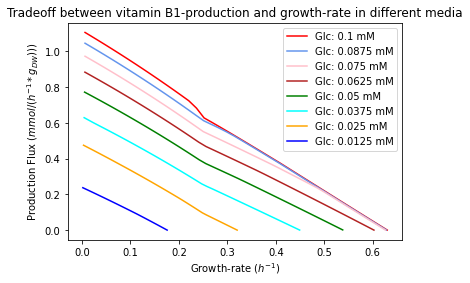

In [55]:
#plot results
#plt.plot(Growth_rates[1], excretion_fluxes[1], 
#            color="black", label="Glc: 1 mM")
#plt.plot(Growth_rates[0.75], excretion_fluxes[0.75], 
#            color="firebrick", label="Glc: 0.75 mM")
#plt.plot(Growth_rates[0.5], excretion_fluxes[0.5], 
#            color="cyan", label="Glc: 0.5 mM")
#plt.plot(Growth_rates[0.25], excretion_fluxes[0.25], 
#            color="cornflowerblue", label="Glc: 0.25 mM")
plt.plot(Growth_rates[0.1], excretion_fluxes[0.1], 
            color="red", label="Glc: 0.1 mM")
plt.plot(Growth_rates[0.0875], excretion_fluxes[0.0875], 
            color="cornflowerblue", label="Glc: 0.0875 mM")
plt.plot(Growth_rates[0.075], excretion_fluxes[0.075], 
            color="pink", label="Glc: 0.075 mM")
plt.plot(Growth_rates[0.0625], excretion_fluxes[0.0625], 
            color="firebrick", label="Glc: 0.0625 mM")
plt.plot(Growth_rates[0.05], excretion_fluxes[0.05], 
            color="green", label="Glc: 0.05 mM")
plt.plot(Growth_rates[0.0375], excretion_fluxes[0.0375], 
            color="cyan", label="Glc: 0.0375 mM")
plt.plot(Growth_rates[0.025], excretion_fluxes[0.025], 
            color="orange", label="Glc: 0.025 mM")
plt.plot(Growth_rates[0.0125], excretion_fluxes[0.0125], 
            color="blue", label="Glc: 0.0125 mM")
plt.legend()
plt.xlabel("Growth-rate ($h^{-1}$)")
plt.ylabel("Production Flux ($mmol/(h^{-1}*g_{DW}$)))")
plt.title("Tradeoff between vitamin B1-production and growth-rate in different media")
plt.savefig('CompOfInterest_abs.png',dpi=500)
plt.show()


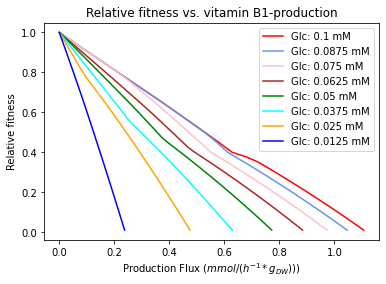

In [56]:
#plot results
#plt.plot(excretion_fluxes[1],[i/Growth_rates[1][-1] for i in Growth_rates[1]],
#            color="black", label="Glc: 1 mM")
#plt.plot(excretion_fluxes[0.5],[i/Growth_rates[0.5][-1] for i in Growth_rates[0.5]], 
#            color="cyan", label="Glc: 0.5 mM")
plt.plot(excretion_fluxes[0.1],[i/Growth_rates[0.1][-1] for i in Growth_rates[0.1]], 
            color="red", label="Glc: 0.1 mM")
plt.plot(excretion_fluxes[0.0875],[i/Growth_rates[0.0875][-1] for i in Growth_rates[0.0875]], 
            color="cornflowerblue", label="Glc: 0.0875 mM")
plt.plot(excretion_fluxes[0.075],[i/Growth_rates[0.075][-1] for i in Growth_rates[0.075]],
            color="pink", label="Glc: 0.075 mM")
plt.plot(excretion_fluxes[0.0625],[i/Growth_rates[0.0625][-1] for i in Growth_rates[0.0625]], 
            color="firebrick", label="Glc: 0.0625 mM")
plt.plot(excretion_fluxes[0.05],[i/Growth_rates[0.05][-1] for i in Growth_rates[0.05]],
            color="green", label="Glc: 0.05 mM")
plt.plot(excretion_fluxes[0.0375],[i/Growth_rates[0.0375][-1] for i in Growth_rates[0.0375]], 
            color="cyan", label="Glc: 0.0375 mM")
plt.plot(excretion_fluxes[0.025],[i/Growth_rates[0.025][-1] for i in Growth_rates[0.025]], 
            color="orange", label="Glc: 0.025 mM")
plt.plot(excretion_fluxes[0.0125],[i/Growth_rates[0.0125][-1] for i in Growth_rates[0.0125]], 
            color="blue", label="Glc: 0.0125 mM")

plt.legend()
plt.ylabel("Relative fitness")
plt.xlabel("Production Flux ($mmol/(h^{-1}*g_{DW}$)))")
plt.title("Relative fitness vs. vitamin B1-production")
plt.savefig('CompOfInterest_rel.png',dpi=500)
plt.show()


## Pareto front
Here we investigate the pareto-efficient tradeoff between investment in additional ATP-expenditure and investment in additional (cytosolic) protein at different growth rates. In order to obtain an RBA-problem variable, representing the average cytosolic protein, we add a process (ID: P_Dummy_Cytosol and name: Dummy_process_Cytosol), without any function and a machinery composed of one average_protein_Cytoplasm, to the model and rebuild the session.

Then we determine the maximum wild-type growth-rate and define several growth-rates between 0 and the maximum. For each of those we then determine the pareto-front between the  variables 'P_Dummy_Cytosol' and 'R_maintenance_atp'. 
#### --> Relevant rbatools.rba_session.SessionRBA methods used here, are 'find_max_growth_rate', 'set_growth_rate', 'get_current_parameter_value' and 'get_pareto_front'.

In [4]:
Simulation.reload_model()
# generate process object:
test_process=rba.xml.processes.Process(id_="P_Dummy_Cytosol", 
                                       name="Dummy_process_Cytosol")
# define machinery composition of added process:
test_process.machinery.machinery_composition.reactants._elements.append(
    rba.xml.common.SpeciesReference(species="average_protein_Cytoplasm",
                                    stoichiometry=1))
# add process to model:
Simulation.model.processes.processes.append(test_process)
# determine total number of peptides of protein, constituting machinery
process_machinery_amino_acid_length=sum(list(Simulation.get_protein_information("average_protein_Cytoplasm")['AAcomposition'].values()))

Simulation.rebuild_from_model()


In [5]:
print(Simulation.get_current_parameter_value.__doc__)


        Return current value of model parameter (depending on currently
        set growth-rate and medium-composition).

        Parameters
        ----------
        parameter : str
            ID of model parameter

        Returns
        -------
        Float: Parameter value
        


In [6]:
print(Simulation.get_pareto_front.__doc__)


        Determine Pareto front of two model variables or linear combinations of model variables.
        Initially the feasible range of the X variable is determined and the Y variable is optimised 
        at different values of the X variable.

        Parameters
        ----------
        variable_X : str or dictionary
            If str : ID of variable, representing the X-coordinate of the Pareto-front
            If dict: Dictionary with user-specified ID of objective as key and dictionary 
            with variable IDs as values and stoichiometric coefficients in objective as values.
            {'ID_objective_X':{'model_variable_1':coeff,'model_variable_2':coeff, ...}}
            IMPORTANT: ID_objective_X must not equal any model variable ID.
        variable_Y : str
            If str : ID of variable, representing the Y-coordinate of the Pareto-front
            If dict: Dictionary with user-specified ID of objective as key and dictionary 
            with variable IDs as v

In [41]:
Simulation.set_medium({'M_glc':0.025}) #set glucose concentration
mumax_WT = Simulation.find_max_growth_rate(max=1.0) #determine maximum growth-rate
#create list of various growth-rates between 0 and the maximum:
Growth_rates = [mumax_WT*i for i in [0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99,1]]
Results_Pareto = {"Protein":[],"ATP":[],"ATP_net":[],"Growth-rate":[],"Protein_concentration":[]} #create empty data-structure for results
total_AAconcentrations = {} #create empty data structure for total amino-acid concentration
atp_maintenance = {} #create empty data structure for total amino-acid concentration
f = IntProgress(min=0, max=len(Growth_rates)) # initiate progress bar
display(f) #show progress bar
for mu in Growth_rates: #iterate over growth-rates
    f.value += 1 # increment progress bar
    Simulation.set_growth_rate(mu) #set growth rate
    #determine current total number of amino acid residues in cell:
    total_AAconcentrations[mu/mumax_WT] = Simulation.get_current_parameter_value(parameter="amino_acid_concentration")
    atp_maintenance[mu/mumax_WT] = Simulation.get_current_parameter_value(parameter="maintenance_atp")
    # calculate pareto front between variables of interest:
    ParetoFront = Simulation.get_pareto_front(variable_X="P_Dummy_Cytosol_machinery", 
                                            variable_Y="R_maintenance_atp", 
                                            N=100, sign_VY='max')
    # append fraction of maximum growth rate to results
    Results_Pareto["Growth-rate"].append([int(100*mu/mumax_WT)]*ParetoFront.shape[0])
    # append atp values of pareto front to results
    Results_Pareto["ATP"].append(list(ParetoFront["R_maintenance_atp"]))
    Results_Pareto["ATP_net"].append([i-atp_maintenance[mu/mumax_WT] for i in ParetoFront["R_maintenance_atp"]])
    # append proteome-fraction of protein (number of AAs in protein, divided by total cellular number of AAs)
    Results_Pareto["Protein"].append(list(ParetoFront["P_Dummy_Cytosol_machinery"]*process_machinery_amino_acid_length/total_AAconcentrations[mu/mumax_WT]))
    Results_Pareto["Protein_concentration"].append(list(ParetoFront["P_Dummy_Cytosol_machinery"]))


IntProgress(value=0, max=13)

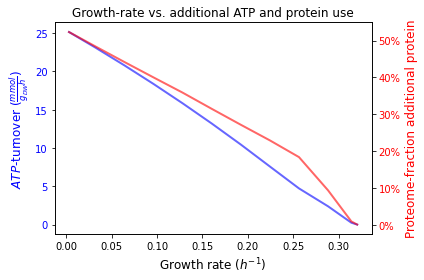

In [64]:
mus=[]
atps=[]
prots=[]
for i in range(len(Results_Pareto["Growth-rate"])):
    if Results_Pareto["Growth-rate"][i][0]==0:
        continue
    mus.append(mumax_WT*Results_Pareto["Growth-rate"][i][0]/100)
    atps.append(Results_Pareto["ATP_net"][i][0])
#    atps.append(Results_Pareto["ATP"][i][0])
    prots.append(Results_Pareto["Protein"][i][-1])
#    prots.append(Results_Pareto["Protein_concentration"][i][-1])

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.plot(mus,atps, linewidth=2, alpha=0.6, color="blue")
ax2=ax.twinx()
ax2.plot(mus,prots, linewidth=2,color="red", alpha=0.6)
ax.tick_params(axis='y', labelcolor="blue")
ax2.tick_params(axis='y', labelcolor="red")
ax.set_ylabel("$ATP$-turnover ($\\frac{mmol}{g_{DW} h}$)", color="blue", fontsize=12)
ax2.set_ylabel("Proteome-fraction additional protein", color="red", fontsize=12)
#ax2.set_ylabel("Additional cytosolic protein ($\\frac{mmol}{g_{DW}}$)", color="red", fontsize=12)
ax2.set_yticks([0,0.1,0.2,0.3,0.4,0.5])
ax2.set_yticklabels(["{}%".format(int(i*100)) for i in [0,0.1,0.2,0.3,0.4,0.5]])

ax.set_xlabel("Growth rate ($h^{-1}$)", fontsize=12)
plt.title('Growth-rate vs. additional ATP and protein use' )
plt.tight_layout()
plt.savefig('Pareto_variables.png',dpi=500)
plt.show()

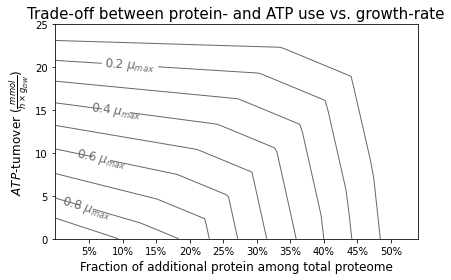

In [65]:
# plot results

def fmt(x):
    s = f"{x/100:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return(s+" $\\mu_{max}$")

#fig = plt.figure(figsize=(8*0.92439,4.025*0.92439))
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
#ax.contourf(numpy.array(Results_Pareto["Protein"]), 
#            numpy.array(Results_Pareto["ATP"]), 
#            numpy.array(Results_Pareto["Growth-rate"]),
#            1000, cmap='gist_yarg')
contours_uneven = ax.contour(numpy.array(Results_Pareto["Protein"]), 
                 #numpy.array(Results_Pareto["ATP"]), 
                 numpy.array(Results_Pareto["ATP_net"]), 
                 numpy.array(Results_Pareto["Growth-rate"]),
                 levels=[10,30,50,70,90], colors='dimgray', linewidths=1)
contours_even = ax.contour(numpy.array(Results_Pareto["Protein"]), 
                 #numpy.array(Results_Pareto["ATP"]), 
                 numpy.array(Results_Pareto["ATP_net"]), 
                 numpy.array(Results_Pareto["Growth-rate"]),
                 levels=[20,40,60,80], colors='dimgray', linewidths=1)
labels = ax.clabel(contours_even, use_clabeltext=True, inline=True, fontsize=12, fmt=fmt, rightside_up=True,inline_spacing=400)
#label_20=ax.clabel(CS20, inline=True, use_clabeltext=True,fmt=fmt,fontsize=12,inline_spacing=400,colors=contrast_line_color)

ax.set_ylim(0, 25)
ax.set_xlim(-0.002, 0.54)
ax.set_xticks([0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5])
ax.set_xticklabels(["{}%".format(int(i*100)) for i in [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]])

ax.set_title("Trade-off between protein- and ATP use vs. growth-rate", fontsize=15)
ax.set_ylabel("$ATP$-turnover ($\\frac{mmol}{h \\times g_{DW}}$)", fontsize=12)
ax.set_xlabel("Fraction of additional protein among total proteome", fontsize=12)

plt.tight_layout()
plt.savefig('Pareto_front.png',dpi=500)
plt.show()


# 4. Investigating the effect of parameters on (growth-optimal) cellular states 

## Kapp sampling - global sensitivity analysis
Here we sample N global sets of enzyme efficiencies, by drawing multiplicative factors for each enzyme's forward- and backward efficiency form a log-normal distribution (base: e). The wild-type efficiencies are then multiplied with this factor and the maximum growth-rate and corresponding exchange fluxes of glucose, oxygen and acetate are determined. 

#### --> Relevant rbatools.rba_session.SessionRBA methods used here, are 'add_parameter_multipliers_for_enzyme_efficiencies', 'set_medium' and 'sample_kapp_multipliers'.

In [ ]:
print(Simulation.add_parameter_multipliers_for_enzyme_efficiencies.__doc__)

In [ ]:
print(Simulation.sample_kapp_multipliers.__doc__)

#### Here we visualise the distribution, from which the scaling factors for enzyme efficiencies are drawn.

In [ ]:
STDEV_SAMPLING = numpy.log(1.1) 
MEAN_SAMPLING = 0

fig, ax = plt.subplots(1, 1)
ax = plt.hist([numpy.e**j for j in list(numpy.random.normal(loc=MEAN_SAMPLING, scale=STDEV_SAMPLING, size=500000))], 200)
plt.title("Distribution of multiplicative scaling factors")
plt.xlabel("(Multiplicative) scaling factor")
plt.ylabel("Frequency")
plt.show()


#### Here we sample a defined number of cellular states with added enzyme efficiency noise: (Please note that a large number of samples requires long comutation times and therefore we chose only 30).

In [ ]:
N_SAMPLES = 30

Simulation.reload_model()
# add parameter multipliers for each enzyme efficiency (initialized as 1.0):
enzymes = Simulation.add_parameter_multipliers_for_enzyme_efficiencies()
Simulation.set_medium({'M_glc':0.025}) # set growth-rate
# define variable names of decision variables in mudel to record for each sample:
Variables_to_record = ["R_EX_glc_e", "R_EX_ac_e","R_EX_o2_e"]
# draw specified number of samples, from distribution with specified parameters and record specified decision variable each run
KappScreenResults = Simulation.sample_kapp_multipliers(n=N_SAMPLES,mean=MEAN_SAMPLING,stdev=STDEV_SAMPLING,enzymes=enzymes,Variables_to_record=Variables_to_record)


In [ ]:
# plot results
df = pandas.DataFrame(KappScreenResults)

fig, ax = plt.subplots(4, 1,figsize=(8,8))

seaborn.histplot(data=df.loc[(df["Mu"]!=4)&(df["Mu"]!=None)],
                 x="Mu", ax=ax[0], alpha=0.3, color="dimgray", 
                 kde=False, line_kws={"linewidth":4,"alpha":1}, 
                 bins=19, fill=True)
ax[0].legend(["Growth rate ($h^{-1}$)"], frameon=False, 
             loc="upper right", fontsize=13)
ax[0].set_yticks([])
ax[0].set_ylabel("")
ax[0].set_xlabel("")

seaborn.histplot(data=df.loc[(df["R_EX_o2_e"]!=None)], 
                 x="R_EX_o2_e", ax=ax[1], alpha=0.3, color="indianred", 
                 kde=False, line_kws={"linewidth":4,"alpha":1}, 
                 bins=15, fill=True)
ax[1].legend(["$O_2$ uptake: ($\\frac{mmol}{h \\times g_{DW}}$)"], frameon=False,
             loc="upper right", fontsize=13)
ax[1].set_yticks([])
ax[1].set_ylabel("")
ax[1].set_xlabel("")

seaborn.histplot(data=df.loc[(df["R_EX_glc_e"]!=None)], 
                 x="R_EX_glc_e", ax=ax[2], alpha=0.3, color="steelblue", 
                 kde=False, line_kws={"linewidth":4,"alpha":1}, 
                 bins=20, fill=True)
ax[2].legend(["$Glucose$ uptake: ($\\frac{mmol}{h \\times g_{DW}}$)"],frameon=False,
             loc="upper right", fontsize=13)
ax[2].set_yticks([])
ax[2].set_ylabel("")
ax[2].set_xlabel("")

seaborn.histplot(data=-df.loc[(df["R_EX_ac_e"]!=None)], 
                 x="R_EX_ac_e", ax=ax[3], alpha=0.3, color="mediumseagreen", 
                 kde=False, line_kws={"linewidth":4,"alpha":1}, 
                 bins=30, fill=True)
ax[3].legend(["$Acetate$ excretion: ($\\frac{mmol}{h \\times g_{DW}}$)"], frameon=False,
             loc="upper right", fontsize=13)
ax[3].set_yticks([])
ax[3].set_ylabel("")
ax[3].set_xlabel("")

ax[0].set_title("Cellular state variability from sampled enzyme efficiencies", fontsize=15)

plt.tight_layout()
plt.show()


## Ribosome efficiency sampling
Here we screen the impact of modulation of ribosome-capacity on the maximum growth-rate at different glucose concentrations. At each growth rate multiplicative modulators on ribosome-capacity between 0.01 and 100 are applied and the maximum growth-rate is determined.
#### --> Relevant rbatools.rba_session.SessionRBA methods used here, are 'add_parameter_multiplier', 'setMedium' and 'screen_multipliers'.

In [ ]:
print(Simulation.add_parameter_multiplier.__doc__)

In [ ]:
print(Simulation.screen_multipliers.__doc__)

In [ ]:
Simulation.reload_model()

Glucose_concentrations = [0.0125,0.025,0.05,0.1,1] # generate list of glucose concentrations to test

# add parameter multiplier for ribosome capacity (initialized as 1.0):
Simulation.add_parameter_multiplier(model_parameter="ribosome_capacity", rebuild_model=True)
log_factors = [-2,-1.5,-1,-0.5,0,0.5,1,1.5,2] # define (logarithmic, base 10) multipliers to test

Results={} # initiate empty result-storing structure
f = IntProgress(min=0, max=len(Glucose_concentrations)) # initiate progress bar
display(f) # show progress bar
for glc_conc in Glucose_concentrations: # iterate over glucose concentrations
    f.value += 1 # increment progress bar
    Simulation.set_medium({'M_glc':glc_conc}) # set glucose concentration in medium
    # screen the defined multipliers:
    screen_results = Simulation.screen_multipliers(parameter="ribosome_capacity", 
                                                 factors=[10**i for i in log_factors])
    # store results:
    scaling_factors , growth_rates = [list(i) for i in zip(*screen_results.items())]
    Results[glc_conc] = {"Scaling Factors":scaling_factors,"Growth_rates":[i["Mu"] for i in growth_rates]}


In [ ]:
# plot results
color_dict = {0.0125:"lightsteelblue",0.025:"orange",0.05:"lightsteelblue",0.1:"steelblue",1:"steelblue"}
alpha_dict = {0.0125:0.3,0.025:0.8,0.05:0.7,0.1:0.4,1:1}

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)

log_scaling_coeffs = [numpy.log10(i) for i in Results[glc_conc]["Scaling Factors"]]
for glc_conc in reversed(Glucose_concentrations):
    if glc_conc in color_dict.keys():
        ax.scatter(log_scaling_coeffs, Results[glc_conc]["Growth_rates"],
                   color=color_dict[glc_conc], alpha=1, s=50, edgecolor='none')
plt.legend(["$Glucose$ : {} $mM$".format(glc_conc) for glc_conc in reversed(Glucose_concentrations) if glc_conc in color_dict.keys()],
           fontsize=12, frameon=False)
ax.vlines(x=0, ymin=0, ymax=1.6, linestyles="dashed", color="black",
          linewidth=1, alpha=0.3)
for glc_conc in Glucose_concentrations:
    if glc_conc in color_dict.keys():
        ax.plot(log_scaling_coeffs, Results[glc_conc]["Growth_rates"],
                color=color_dict[glc_conc], alpha=alpha_dict[glc_conc])
for glc_conc in Glucose_concentrations:
    if glc_conc in color_dict.keys():
        ax.scatter([numpy.log10(i) for i in Results[glc_conc]["Scaling Factors"]],
                   Results[glc_conc]["Growth_rates"], color=color_dict[glc_conc], 
                   alpha=alpha_dict[glc_conc], s=50, edgecolor='none')

ax.set_title("Effect of ribosome capacity modulation on growth-rate", fontsize=15)
ax.set_xlabel("Scaling factor ribosome capacity", fontsize=12)
ax.set_ylabel("Growth-rate ($h^{-1}$)", fontsize=12)
ax.set_xticks([-2,-1,1,2,0])
ax.set_xticklabels([str("$10^{"+str(i)+"}$") for i in [-2,-1,1,2]]+[str(1)])

plt.tight_layout()
plt.show()


## Local sensitivity analysis of growth rate vs. ribosome capacity over glucose concentrations
Here we perform local sensitivity analysis of maximum growth-rate on ribosome- and glucose-uptake (PTSG-system) efficiency at different glucose concentrations. Local sensitivity is represented as the partial derivative of maximum growth-rate vs. model-parameter values at wild-type. 

Absolute sensitivity represents the the change in growth-rate per change in parameter value.
Scaled sensitivity represents the relative change in growth-rate per relative change in parameter value.
#### --> Relevant rbatools.rba_session.SessionRBA methods used here, are 'add_parameter_multiplier', 'setMedium' and 'local_sensitivity'.

In [ ]:
print(Simulation.local_sensitivity.__doc__)

In [ ]:
Simulation.reload_model()

Glucose_concentrations = [0.00625*(i+1) for i in range(16)] # generate list of glucose concentrations to test

Local_sensitivities = {} # initiate empty result-storing structure
f = IntProgress(min=0, max=len(Glucose_concentrations)) # initiate progress bar
display(f) # show progress bar
for glc_conc in Glucose_concentrations: # iterate over glucose concentrations
    f.value += 1 # increment progress bar  
    Simulation.set_medium({'M_glc':glc_conc}) # set glucose concentration in medium
    # perform local sensitivity analysis:
    res = Simulation.local_sensitivity(parameters=["ribosome_capacity",'TptsG_efficiency'],
                                       relative_parameter_difference=0.01)
    Local_sensitivities[glc_conc] = res # store results


In [ ]:
# plot results
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)

ax.plot([glc_conc for glc_conc in Glucose_concentrations if glc_conc<=1],
        [Local_sensitivities[glc_conc].loc["ribosome_capacity","Scaled_Sensitivity"] for glc_conc in Glucose_concentrations if glc_conc<=1],
                color="indianred",
                linewidth=2,
                linestyle="dashed")
ax.scatter([glc_conc for glc_conc in Glucose_concentrations if glc_conc<=1],
           [Local_sensitivities[glc_conc].loc["ribosome_capacity","Scaled_Sensitivity"] for glc_conc in Glucose_concentrations if glc_conc<=1],
                color="indianred")
ax2 = ax.twinx()
ax2.plot([glc_conc for glc_conc in Glucose_concentrations if glc_conc<=1],
         [Local_sensitivities[glc_conc].loc["ribosome_capacity","Absolute_Sensitivity"] for glc_conc in Glucose_concentrations if glc_conc<=1],
                color="steelblue",
                linewidth=2,
                linestyle="dashed")
ax2.scatter([glc_conc for glc_conc in Glucose_concentrations if glc_conc<=1],
            [Local_sensitivities[glc_conc].loc["ribosome_capacity","Absolute_Sensitivity"] for glc_conc in Glucose_concentrations if glc_conc<=1],
                color="steelblue")

ax.set_title("Local sensitivities ribosome_capacity at $WT$ capacity")
ax.set_xlabel("Glucose concentration ($mM$)", labelpad=0.1)
ax.set_ylabel("Scaled sensitivity", color="indianred")
ax2.set_ylabel('Absolute sensitivity', color="steelblue")

plt.show()

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)

ax.plot([glc_conc for glc_conc in Glucose_concentrations if glc_conc<=1],
        [Local_sensitivities[glc_conc].loc["TptsG_efficiency","Scaled_Sensitivity"] for glc_conc in Glucose_concentrations if glc_conc<=1],
                color="indianred",
                linewidth=2,
                linestyle="dashed")
ax.scatter([glc_conc for glc_conc in Glucose_concentrations if glc_conc<=1],
           [Local_sensitivities[glc_conc].loc["TptsG_efficiency","Scaled_Sensitivity"] for glc_conc in Glucose_concentrations if glc_conc<=1],
                color="indianred")
ax2 = ax.twinx()
ax2.plot([glc_conc for glc_conc in Glucose_concentrations if glc_conc<=1],
         [Local_sensitivities[glc_conc].loc["TptsG_efficiency","Absolute_Sensitivity"] for glc_conc in Glucose_concentrations if glc_conc<=1],
                color="steelblue",
                linewidth=2,
                linestyle="dashed")
ax2.scatter([glc_conc for glc_conc in Glucose_concentrations if glc_conc<=1],
            [Local_sensitivities[glc_conc].loc["TptsG_efficiency","Absolute_Sensitivity"] for glc_conc in Glucose_concentrations if glc_conc<=1],
                color="steelblue")

ax.set_title("Local sensitivities TptsG_efficiency at $WT$ capacity")
ax.set_xlabel("Glucose concentration ($mM$)", labelpad=0.1)
ax.set_ylabel("Scaled sensitivity", color="indianred")
ax2.set_ylabel('Absolute sensitivity', color="steelblue")
plt.show()


# 5. Investigating the effect of Gene KO´s on cellular fitness

Here we apply single knock-outs for all genes, associated with non-transport metabolic reactions and evaluate their effects on the maximum growth-rate.

#### --> Relevant rbatools.rba_session.SessionRBA methods used here, are 'setMedium', 'find_max_growth_rate', 'get_reactions', 'get_reaction_information', 'apply_gene_knock_out', 'set_growth_rate', 'solve' and  'undo_gene_knock_out'.

In [ ]:
print(Simulation.get_reactions.__doc__)

In [ ]:
print(Simulation.get_reaction_information.__doc__)

In [ ]:
print(Simulation.apply_gene_knock_out.__doc__)

In [ ]:
print(Simulation.solve.__doc__)

In [ ]:
print(Simulation.undo_gene_knock_out.__doc__)

#### Here we do the gene-KO screen: (Please note that a screen over all respective genes is very time-consuming, therefore we abort the screen after a COUNT_LIMIT of 30. If you wish to do the full screen, plese set the COUNT_LIMIT variable to None)

In [ ]:
COUNT_LIMIT = 50
#COUNT_LIMIT=None

Simulation.reload_model()

Simulation.set_medium({'M_glc':0.1}) # set medium
mu_WT = Simulation.find_max_growth_rate() # determine wild-type growth-rate

KO_mus = {} # initiate results structure
count = 0
#f = IntProgress(min=0, max=len(Simulation.get_reactions())) # initiate progress bar
#display(f) # show progress bar
for rxn in Simulation.get_reactions(): # iterate over all model reactions
    #f.value += 1 # increment progress bar   
    if COUNT_LIMIT is not None:
        if count>=COUNT_LIMIT:
            break
    rxn_info = Simulation.get_reaction_information(rxn) # retrieve information on reaction
    if rxn_info['Type'] == 'Normal': # Only continue if reaction is not transport
        if rxn_info['Enzyme']!='': # Only continue if reaction has associated enzyme
            try:
                rxn_subunits = list(Simulation.get_enzyme_information(rxn_info['Enzyme'])['Subunits'].keys()) 
                # All proteins associated with reaction's enzyme
                for rxn_su in rxn_subunits:
                    if not rxn_su in KO_mus.keys(): #only continue if proteins has not bee checked before
                        Simulation.apply_gene_knock_out(gene=rxn_su) # knock out protein
                        #check whether wild-type growth-rate is feasible
                        Simulation.set_growth_rate(mu_WT) 
                        mu_WT_feasible = Simulation.solve()
                        if not mu_WT_feasible: # if WT growth rate is not feasible we have to find the maximum one
                            # Ergo: (mu_max < mu_WT)
                            #check whether cell can grow at all with knock-out
                            Simulation.set_growth_rate(0.0)
                            mu_zero_feasible = Simulation.solve()
                            if not mu_zero_feasible:
                                # if growth rate 0 is infeasible, cell is growth-deficient 
                                # Ergo: (mu_max = 0)
                                KO_mus.update({rxn_su:0})
                            else:
                                # if growth rate 0 is feasible, we have to find the maximum growth rate 
                                # Ergo: (0 < mu_max < mu_WT)
                                KO_mus.update({rxn_su:Simulation.find_max_growth_rate(max=mu_WT)})
                        else: 
                            # if WT growth-rate is feasible, we dont need to run the search for maximum growth-rate.
                            # Ergo: (mu_max = mu_WT)
                            KO_mus.update({rxn_su:mu_WT})
                        Simulation.undo_gene_knock_out(gene=rxn_su) # undo gene-KO
                    count+=1
            except:
                if not rxn_su in KO_mus.keys():
                    KO_mus.update({rxn_su:numpy.nan})


#### Here we write the obtained results into a new data structure, holding information on gene ID, KO growth-rate and an annotation of the KO´s effect on growth-rate (relative to wild-type):

In [ ]:
KO_effects = pandas.DataFrame() 
for i in KO_mus.keys():
    if numpy.isfinite(KO_mus[i]):
        KO_effects.loc[i,"Gene"] = i
        KO_effects.loc[i,"Mu"] = KO_mus[i]
        if KO_mus[i] == mu_WT:
            KO_effects.loc[i,"KO effect"] = "No effect"
        elif KO_mus[i] == 0:
            KO_effects.loc[i,"KO effect"] = "Growth deficiency"
        else:
            KO_effects.loc[i,"KO effect"] = "Growth-rate reduction"


number_growth_deficiency = KO_effects.loc[KO_effects["KO effect"]=="Growth deficiency"].shape[0]      
number_growth_reduction = KO_effects.loc[KO_effects["KO effect"]=="Growth-rate reduction"].shape[0]      
number_no_effect = KO_effects.loc[KO_effects["KO effect"]=="No effect"].shape[0]      

print("Number of genes without effect on growth-rate: {}".format(number_no_effect))
print("Number of genes with growth-deficiency effect: {}".format(number_growth_deficiency))
print("Number of genes with reducing effect on growth-rate: {}".format(number_growth_reduction))


In [ ]:
# plot results
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
hist  =ax.hist(KO_effects.loc[KO_effects["KO effect"]=="Growth-rate reduction","Mu"], 15)
ax.set_title("Distribution of maximum growth-rates with gene KOs")
ax.set_xlabel("Growth-rate")
ax.set_ylabel("Frequency")


# 6. RBA-derived FBA

Here we want to compare the growth-rates, predicted with two variants of the RBA-model derived FBA over different medium-conditions.
We screen over different glucose concentrations.
At first we predict the maximum growth-rate and growth-optimal exchange fluxes with RBA. Then we generate the corresponding FBA problem and once solve it with the RBA-derived biomass-function (dependent on growth-rate and cellular state) and once solved it with a biomass function, derived and adapted from literature (http://bigg.ucsd.edu/models/iYO844). In each of the FBA simulations we maximise the biomass-function rate, under the constraints for carbon- and nitrogen (glucose and ammonium) uptake rates, predicted by RBA.

#### --> Relevant rbatools.rba_session.SessionRBA methods used here, are 'add_reaction', 'set_medium', 'find_max_growth_rate', 'return_exchange_fluxes', 'build_fba_model'.

#### --> Relevant rbatools.fba_problem.ProblemFBA methods used here, are 'clear_objective', 'set_objective','set_lb', 'set_ub' and 'solve_lp'


In [ ]:
print(Simulation.build_fba_model.__doc__)

#### Since there is no biomass-reaction in the RBA-model used, we have to add it. This is derived from an existing FBA model of B.subtilis, and the metabolite IDs are adapted. (Please note, that metabolites, not present in the RBA-model are ignored):

In [ ]:
# define products of biomass reaction
products = {"M_adp_c":104.997414,"M_h_c":105,"M_p_c":104.985613}

# define reactants of biomass reaction
reactants = {"M_ala_c":0.266902,
           "M_fthf_c":0.000367,
           "M_ala_c":0.266902,
           "M_amp_c":0.00467,
           "M_arg_c":0.193021,
           "M_asn_c":0.147987,
           "M_asp_c":0.148014,
           "M_atp_c":105.053483,
           "M_ca2_c":0.003205,
           "M_cl_c":5e-06,
           "M_cdp_c":0.000251,
           "M_cmp_c":0.001042,
           "M_ctp_c":0.038902,
           "M_cys_c":0.05699,
           "M_datp_c":0.022982,
           "M_dctp_c":0.01738,
           "M_dgtp_c":0.017398,
           "M_dttp_c":0.022899,
           "M_fe3_c":0.00345,
           "M_gdp_c":0.00018,
           "M_gln_c":0.260335,
           "M_glu_c":0.260378,
           "M_gly_c":0.408288,
           "M_gmp_c":0.000503,
           "M_wtaout_c":0.002347,
           "M_gtp_c":0.062667,
           "M_h2o_c":105,
           "M_his_c":0.081739,
           "M_ile_c":0.269905,
           "M_k_c":0.706312,
           "M_leu_c":0.346445,
           "M_lys_c":0.323093,
           "M_1gdg_c":8.6e-05,
           "M_met_c":0.113326,
           "M_mg2_c":0.101714,
           "M_mmq_c":0.000266,
           "M_nad_c":0.016164,
           "M_nadp_c":0.000934,
           "M_nadph_c":0.000216,
           "M_pgout_c":0.101817,
           "M_pgo_c":0.000176,
           "M_phe_c":0.175939,
           "M_pp_c":0.000918,
           "M_pro_c":0.160642,
           "M_pe_c":0.00056,
           "M_ser_c":0.216213,
           "M_3gdg_c":6.6e-05,
           "M_thr_c":0.186317,
           "M_trp_c":0.054336,
           "M_tyr_c":0.110824,
           "M_utp_c":0.041501,
           "M_val_c":0.306734}

Simulation.reload_model()
# add biomass function to model, named R_BIOMASS_BS_10:
Simulation.add_reaction(reaction_id = "R_BIOMASS_BS_10",
                        reactants=reactants, products=products,
                        reversible=False)
Simulation.rebuild_from_model()

In [ ]:
exchanges_to_impose = ["M_glc","M_nh3"] # define exchange reactions to impose onto the FBA model
glcs = [0.005+(i*0.0025) for i in range(26)]  # generate list of glucose concentrations to test
rba_mumax = [] #generate empty list for RBA-predicted growth rates
fba_fixedBMf_mumax = [] #generate empty list for FBA-predicted growth rates with R_BIOMASS_BS_10 as biomass function
rba_targetBMf_mumax = [] #generate empty list for RBA-predicted growth rates with RBA-derived as biomass function
f = IntProgress(min=0, max=3*len(glcs)) #initiate progress bar
display(f) #show progress bar
for glc_conc in glcs:
    Simulation.rebuild_from_model()
    Simulation.set_medium({'M_glc':glc_conc}) #set glucose concentration
    # predict maximum RBA growth-rate
    mumax=Simulation.find_max_growth_rate()
    f.value += 1 #increment progress bar
    rba_mumax.append(mumax) # store predicted growth rate
    J_ex = Simulation.return_exchange_fluxes() #extract exchange fluxes from rba-solution
    #filter exchanges
    exchange_bounds = {Simulation.ExchangeReactionMap[i]:-J_ex[i] for i in J_ex.keys() if i in exchanges_to_impose}
  
    ##### FBA with RBA-derived biomass function ######
    #Construct fba problem with RBA-specific biomass-function:
    Simulation.build_fba_model(rba_derived_biomass_function=True, from_rba_solution=True)
    Simulation.FBA.clear_objective() #set all objective coefficients to 0
    Simulation.FBA.set_objective({'R_BIOMASS_targetsRBA': -1.0}) # set objective to maximize this biomass-function
    #impose exchange-fluxes:
    Simulation.FBA.set_lb(exchange_bounds) 
    Simulation.FBA.set_ub(exchange_bounds)
    Simulation.FBA.solve_lp() #solve FBA problem to maximize R_BIOMASS_targetsRBA
    if Simulation.FBA.Solved:
        rba_targetBMf_mumax.append(-Simulation.FBA.ObjectiveValue) # store predicted growth rate
    else:
        rba_targetBMf_mumax.append(numpy.nan)
    f.value += 1 #increment progress bar    
    
    ##### FBA with literature-derived biomass function ######
    Simulation.FBA.clear_objective() #set all objective coefficients to 0
    Simulation.FBA.set_objective({'R_BIOMASS_BS_10': -1.0}) # set objective to maximize this biomass-function
    Simulation.FBA.solve_lp() #solve FBA problem to maximize R_BIOMASS_BS_10
    if Simulation.FBA.Solved:
        fba_fixedBMf_mumax.append(-Simulation.FBA.ObjectiveValue) # store predicted growth rate
    else:
        fba_fixedBMf_mumax.append(numpy.nan)
    f.value += 1 #increment progress bar   


In [ ]:
# plot results
plt.plot(glcs, rba_mumax,color="black", label="RBA", linewidth=1, alpha=0.8)
plt.scatter(glcs,fba_fixedBMf_mumax, color="indianred", alpha=0.8,
            label="FBA: Literature-derived BM-function")
plt.scatter(glcs, rba_targetBMf_mumax, color="cornflowerblue",
            label="FBA: RBA-derived BM-function")
plt.title("RBA- vs. FBA growth-rate predictions")
plt.xlabel("Glucose concentration")
plt.ylabel("Predicted growth-rate")
plt.legend()
